In [114]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction,linear_model,model_selection,preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

In [3]:
train=pd.read_csv(r"C:\Users\이재학\tweet\nlp-getting-started\train.csv")

In [4]:
test=pd.read_csv(r"C:\Users\이재학\tweet\nlp-getting-started\test.csv")

In [5]:
sample=pd.read_csv(r"C:\Users\이재학\tweet\nlp-getting-started\sample_submission.csv")

튜토리얼

In [17]:
train[train["target"]==0]["text"].values[1]

'I love fruits'

In [18]:
train[train["target"]==1]["text"].values[1]

'Forest fire near La Ronge Sask. Canada'

In [19]:
count_vectorizer=feature_extraction.text.CountVectorizer()

In [24]:
ex=count_vectorizer.fit_transform(train["text"][0:5])

In [28]:
print(ex[0].todense().shape)

(1, 54)


In [31]:
print(ex[0].todense())

[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [32]:
train_vec=count_vectorizer.fit_transform(train["text"])

In [34]:
test_vec=count_vectorizer.transform(test["text"])

In [36]:
clf=linear_model.RidgeClassifier()

In [37]:
scores=model_selection.cross_val_score(clf,train_vec,train["target"],cv=3,scoring="f1")

In [38]:
scores

array([0.59453669, 0.56455572, 0.64113893])

In [39]:
clf.fit(train_vec,train["target"])

RidgeClassifier()

In [41]:
sample["target"]=clf.predict(test_vec)

In [43]:
sample.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [44]:
sample.to_csv("tutorialsubmission.csv",index=False)

In [46]:
sample.to_csv("tutorialsubmissionzzz.csv",index=True)

튜토리얼 끝

In [47]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [48]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [71]:
q=train["keyword"].value_counts()

In [74]:
q

fatalities               45
armageddon               42
deluge                   42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [79]:
len(train[train["keyword"]=="armageddon"]["target"].values)

42

In [80]:
sum(train[train["keyword"]=="armageddon"]["target"].values)

5

In [ ]:
트레인 키워드에는 221개/ nan도 있고 여기서 -> 각 키워드별로 길이를 재고 sum을해서 0.5를 넘으면 영향 o 아니면 영향x
이걸하기 전에 각 키워드에 관해서 0과1 의 상관계수를 보고 싶음

In [81]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [82]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

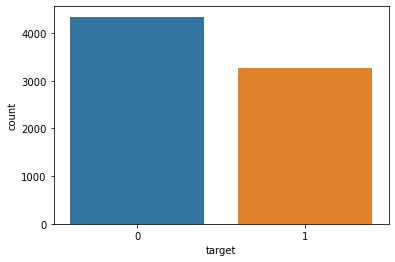

In [85]:
sns.countplot(train['target'])

In [87]:
train.shape

(7613, 5)

In [88]:
train['target'].value_counts()/train.shape[0]

0    0.57034
1    0.42966
Name: target, dtype: float64

In [90]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [91]:
train['keyword'].fillna('no_keyword',inplace=True)

In [95]:
train['location'].fillna('no_location',inplace=True)

In [96]:
train

,id,keyword,location,text,target
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,no_keyword,no_location,Two giant cranes holding a bridge collapse int...,1
7609,10870,no_keyword,no_location,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,no_keyword,no_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,no_keyword,no_location,Police investigating after an e-bike collided ...,1


In [98]:
train.isnull().sum().sum()

0

In [101]:
train['location'].value_counts()[:10]

no_location        2533
USA                 104
New York             71
United States        50
London               45
Canada               29
Nigeria              28
UK                   27
Los Angeles, CA      26
India                24
Name: location, dtype: int64

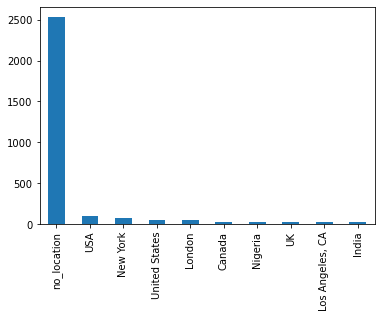

In [107]:
train['location'].value_counts()[:10].plot(kind='bar')

In [108]:
len(train['keyword'].value_counts())

222

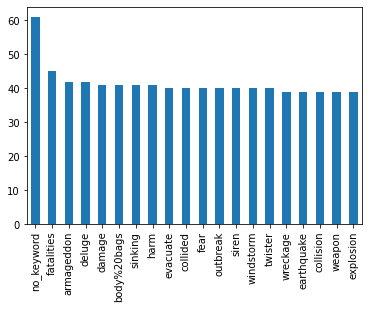

In [109]:
train['keyword'].value_counts()[:20].plot(kind='bar')

In [110]:
train['keyword'].value_counts()[:20]

no_keyword     61
fatalities     45
armageddon     42
deluge         42
damage         41
body%20bags    41
sinking        41
harm           41
evacuate       40
collided       40
fear           40
outbreak       40
siren          40
windstorm      40
twister        40
wreckage       39
earthquake     39
collision      39
weapon         39
explosion      39
Name: keyword, dtype: int64

In [115]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\이재학\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [116]:
from nltk.corpus import stopwords

In [120]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [121]:
import re

In [122]:
from nltk.stem.porter import PorterStemmer

In [130]:
corpus = []
for i in range(0,train.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ',train['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [159]:
corpus = []
for i in range(0,test.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ',test['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [133]:
corpus[:5]

['deed reason earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school']

In [134]:
train['text'][:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [135]:
from sklearn.feature_extraction.text import CountVectorizer

In [136]:
cv=CountVectorizer(max_features=1000)

In [160]:
x=cv.fit_transform(corpus).toarray()

In [161]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [145]:
from sklearn.model_selection import train_test_split

In [150]:
y=train.iloc[:,-1].values

In [151]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [152]:
train

,id,keyword,location,text,target
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,no_keyword,no_location,Two giant cranes holding a bridge collapse int...,1
7609,10870,no_keyword,no_location,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,no_keyword,no_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,no_keyword,no_location,Police investigating after an e-bike collided ...,1


In [153]:
x_train,x_test ,y_train , y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [154]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score
prediction=classifier.predict(x_test)
cm=confusion_matrix(y_test,prediction)

In [157]:
cm

array([[743, 143],
       [199, 438]], dtype=int64)

In [158]:
accuracy_score(y_test,prediction)

0.7754432042022325

In [ ]:
clf.fit(train_vec,train["target"])
sample["target"]=clf.predict(test_vec)
sample.to_csv("tutorialsubmission.csv",index=False)

In [162]:
sample["target"]=classifier.predict(x)

In [163]:
sample.to_csv("notebooksubmission.csv",index=False)